# Trabajo Integrador N°2

## EJERCICIO N° 1

### Ejercicio 1 - Limpieza y Detección de Bordes
Desarrolle un script que combine transformaciones morfológicas y detección de bordes para limpiar y analizar imágenes ruidosas:

1) Cargue una imagen binaria o convierta una imagen a binaria usando umbralización.

2) Aplique operaciones morfológicas de erosión y dilatación para eliminar ruido pequeño y separar objetos conectados incorrectamente.

3) Utilice las operaciones de apertura y cierre para limpiar la imagen y rellenar huecos en los objetos.

4) Implemente detección de bordes usando el operador Sobel en las direcciones X e Y, combine los resultados y visualice las imágenes intermedias.

5) Aplique el detector de bordes Canny con diferentes valores de umbral y compare los resultados con Sobel.

6) Experimente con diferentes tamaños de kernel (3x3, 5x5, 7x7) y analice cómo afecta a los resultados.

7) Cree un script que permita aplicar secuencialmente: binarización → limpieza morfológica → detección de bordes, y muestre el resultado paso a paso.

Sugerencia: Use imágenes que contengan monedas, tornillos, o elementos similares para probar la efectividad de la limpieza morfológica antes de la detección de bordes.


--- Resultados para Kernel 3x3 ---


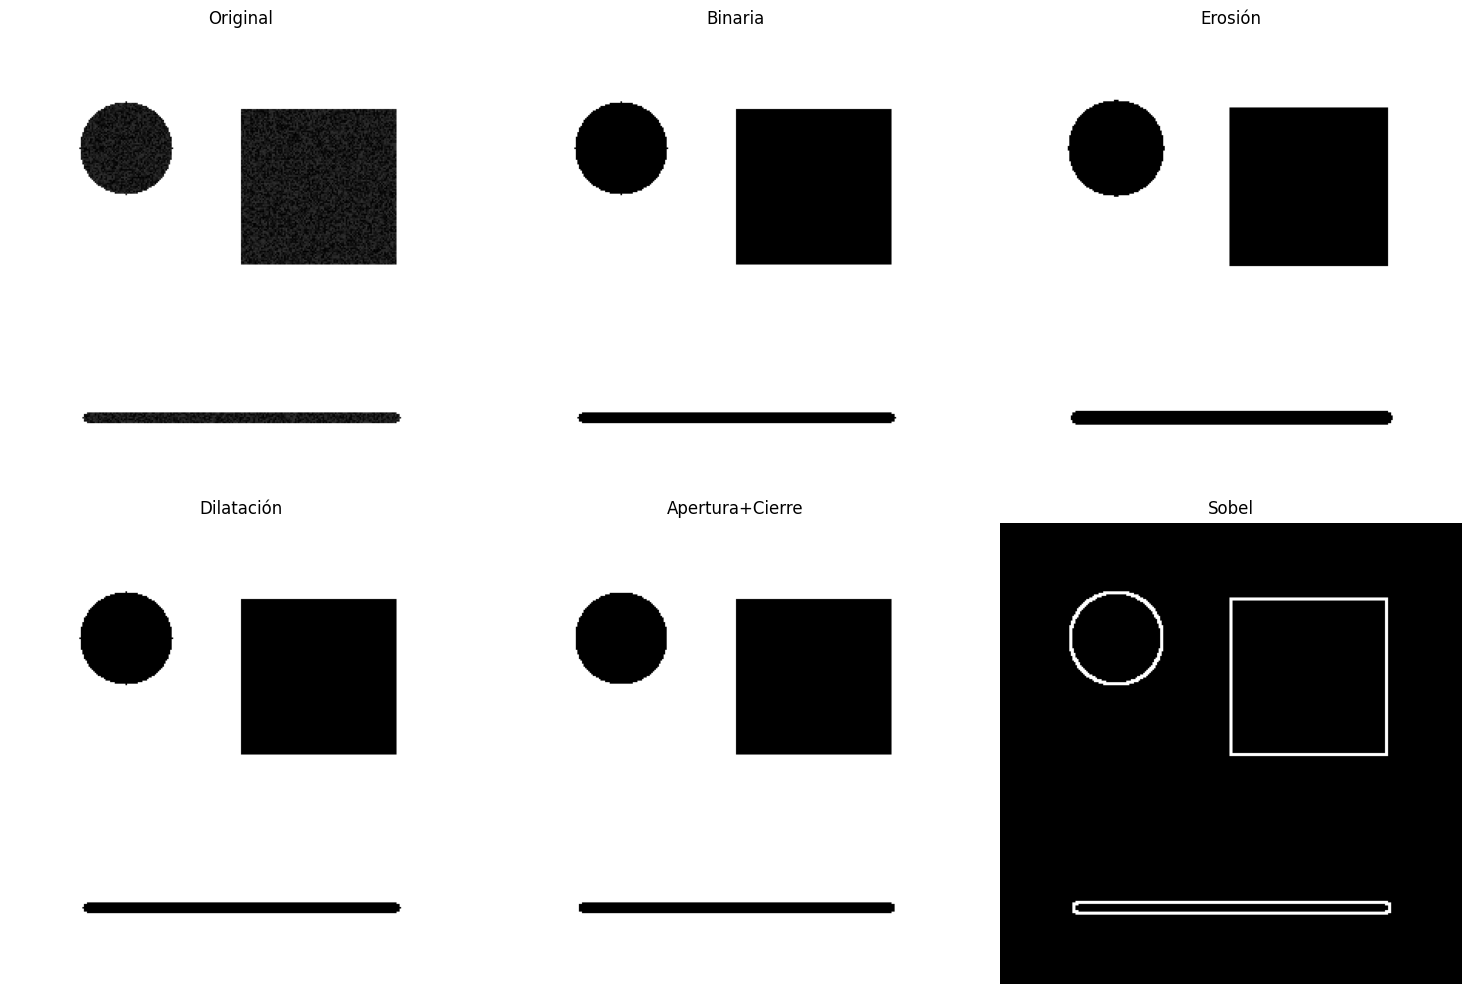

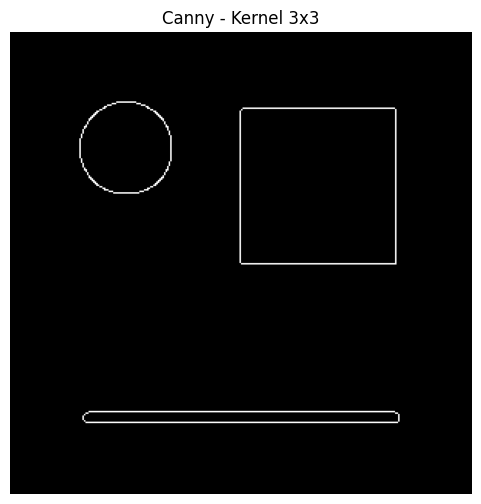


--- Resultados para Kernel 5x5 ---


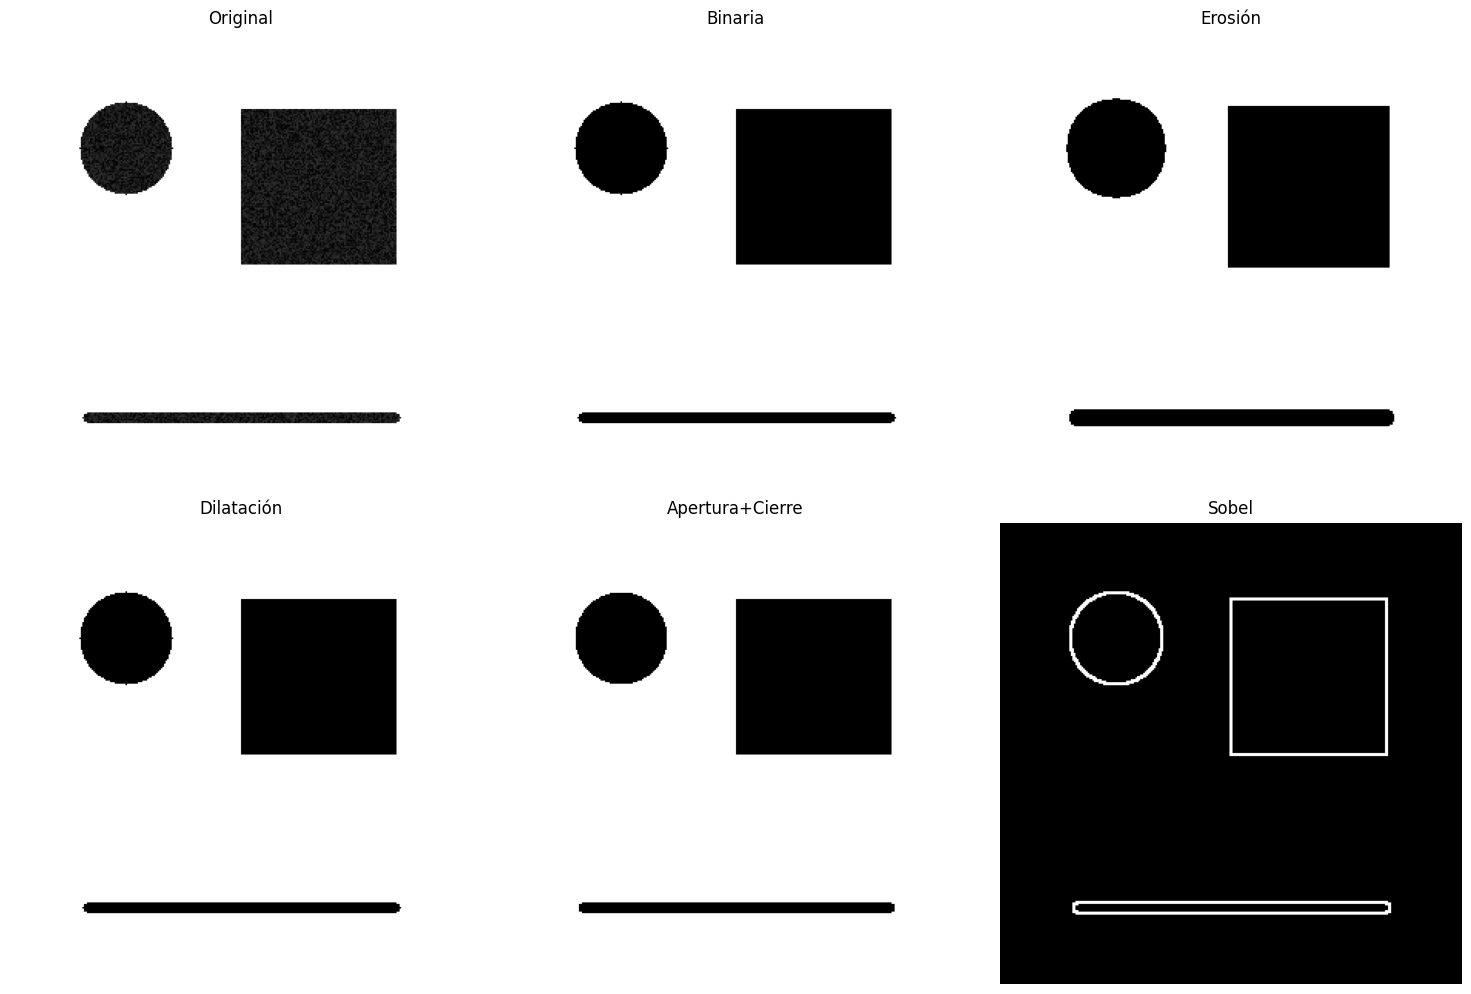

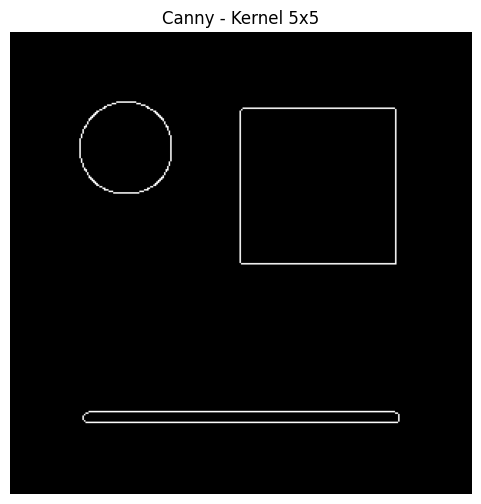


--- Resultados para Kernel 7x7 ---


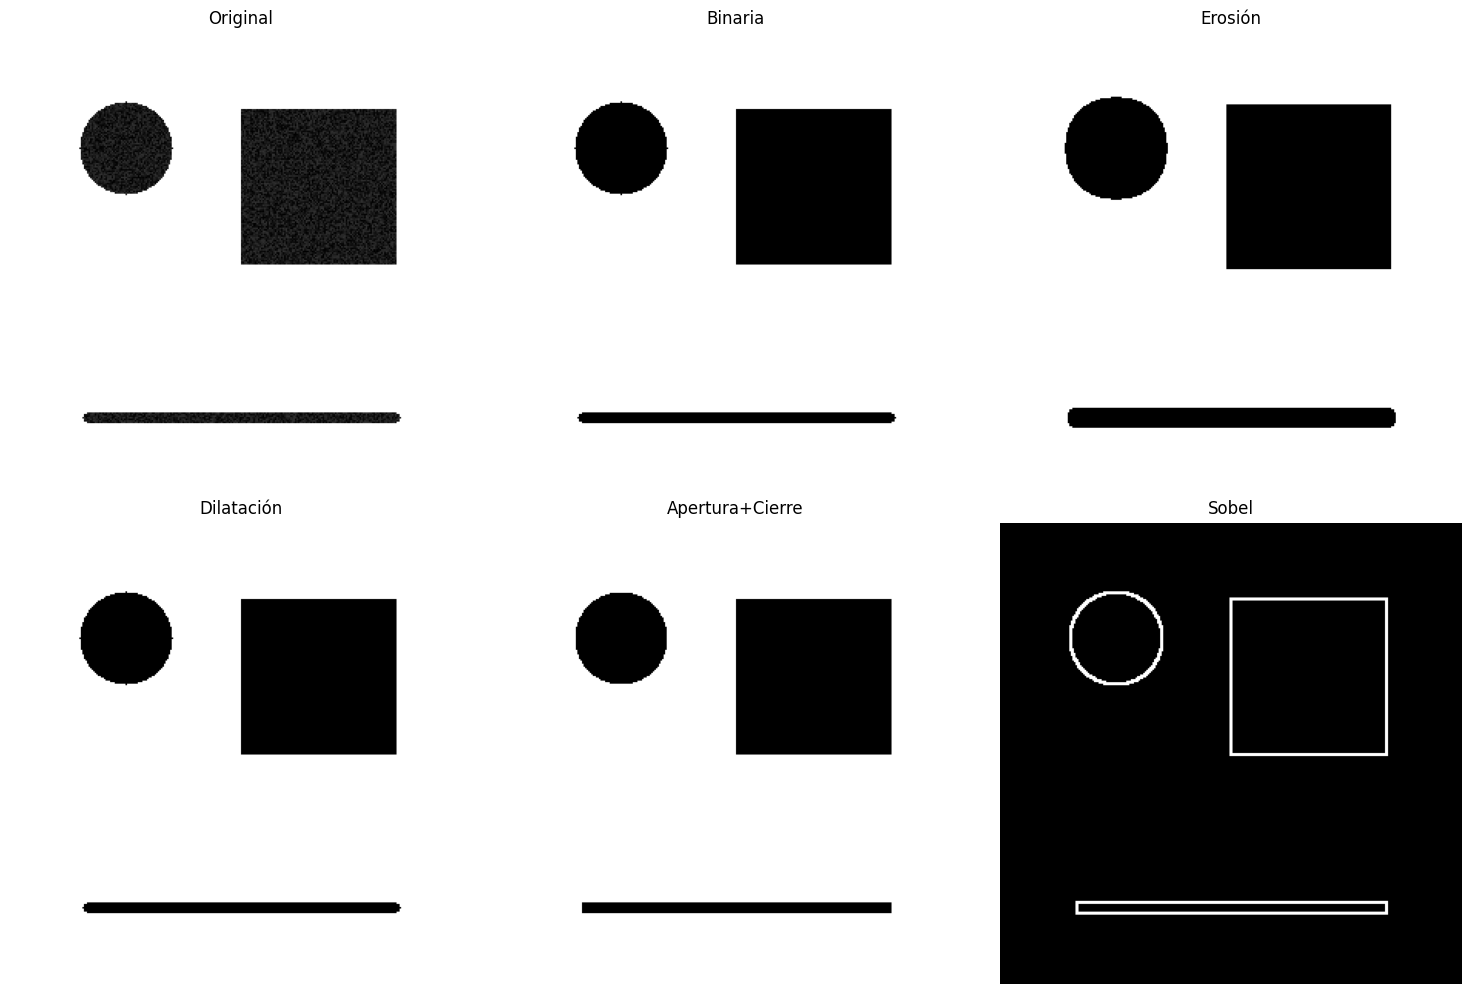

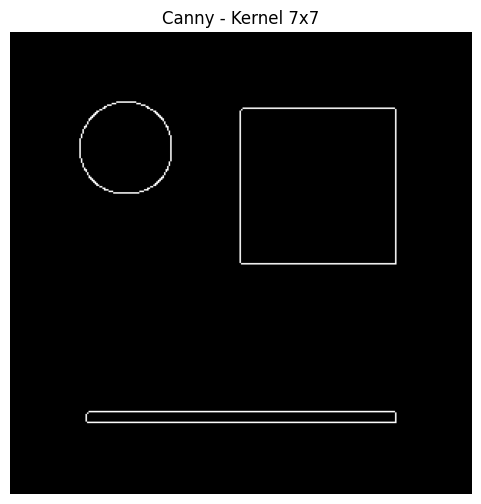

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función auxiliar para mostrar imágenes lado a lado usando matplotlib
def mostrar_imagenes(titulos, imagenes):
    """
    Muestra una lista de imágenes con sus respectivos títulos usando Matplotlib.

    Parámetros:
    titulos (list): Lista de títulos para cada imagen.
    imagenes (list): Lista de imágenes en formato de matriz NumPy.
    """
    plt.figure(figsize=(15, 10))
    for i, (titulo, img) in enumerate(zip(titulos, imagenes)):
        plt.subplot(2, 3, i + 1)
        plt.title(titulo)
        plt.imshow(img, cmap='gray')  # Mostrar en escala de grises
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 1. Cargar imagen en escala de grises
# La imagen debe estar en la misma carpeta que este script
imagen = cv2.imread('imagen_figuras_ruido.png', cv2.IMREAD_GRAYSCALE)

# 2. Umbralización: convertir imagen a binaria (blanco y negro)
# Teoría: La umbralización convierte los píxeles por debajo de un umbral en negro (0)
# y los píxeles por encima en blanco (255), facilitando el procesamiento morfológico.
_, binaria = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

# Definimos diferentes kernels (elementos estructurantes) de varios tamaños
# Teoría: El tamaño del kernel afecta el resultado de las operaciones morfológicas.
kernels = {
    '3x3': np.ones((3, 3), np.uint8),
    '5x5': np.ones((5, 5), np.uint8),
    '7x7': np.ones((7, 7), np.uint8)
}

# Iteramos sobre los distintos tamaños de kernel para observar su efecto
for tam, kernel in kernels.items():
    print(f"\n--- Resultados para Kernel {tam} ---")

    # 3. Erosión: elimina pequeños objetos blancos aislados (ruido)
    erosion = cv2.erode(binaria, kernel, iterations=1)

    # 4. Dilatación: agranda los objetos blancos restaurando su tamaño después de la erosión
    dilatacion = cv2.dilate(erosion, kernel, iterations=1)

    # 5. Apertura: erosión seguida de dilatación, usada para eliminar ruido pequeño
    apertura = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, kernel)

    # 6. Cierre: dilatación seguida de erosión, usada para cerrar pequeños huecos dentro de los objetos
    cierre = cv2.morphologyEx(apertura, cv2.MORPH_CLOSE, kernel)

    # 7. Detección de Bordes con Sobel
    # Teoría: Sobel calcula la derivada en dirección X e Y para detectar bordes horizontales y verticales.
    sobelx = cv2.Sobel(cierre, cv2.CV_64F, 1, 0, ksize=3)  # Bordes en X
    sobely = cv2.Sobel(cierre, cv2.CV_64F, 0, 1, ksize=3)  # Bordes en Y

    # Combinamos las magnitudes de las derivadas en X e Y
    sobel_comb = cv2.magnitude(sobelx, sobely)
    sobel_comb = np.uint8(np.clip(sobel_comb, 0, 255))  # Convertimos a formato 8 bits

    # 8. Detección de Bordes con Canny
    # Teoría: Canny es un método más sofisticado que usa gradientes y umbrales para detectar bordes precisos.
    canny = cv2.Canny(cierre, 50, 150)

    # Mostrar resultados paso a paso
    mostrar_imagenes(
        ['Original', 'Binaria', 'Erosión', 'Dilatación', 'Apertura+Cierre', 'Sobel'],
        [imagen, binaria, erosion, dilatacion, cierre, sobel_comb]
    )
    
    plt.figure(figsize=(6, 6))
    plt.title(f'Canny - Kernel {tam}')
    plt.imshow(canny, cmap='gray')
    plt.axis('off')
    plt.show()


# Análisis de Resultados

## Comparación de Técnicas

**Transformaciones Morfológicas**:
- **Erosión** elimina el ruido pequeño pero puede reducir el tamaño de los objetos.
- **Dilatación** recupera parcialmente la forma original después de la erosión.
- **Apertura** es excelente para eliminar ruido aislado.
- **Cierre** rellena pequeños huecos en los objetos, mejorando su continuidad.

**Detección de Bordes Sobel**:
- Detecta bordes en direcciones X e Y.
- Bueno para detectar bordes más gruesos.
- Sensible al ruido si la imagen no fue limpiada adecuadamente.

**Detección de Bordes Canny**:
- Más preciso que Sobel.
- Reduce el ruido antes de detectar bordes (aplica un suavizado).
- Permite ajustar sensibilidad mediante los umbrales.

## Influencia del Tamaño del Kernel
- **3x3**: limpieza ligera, conserva detalles finos, ideal para bordes delicados.
- **5x5**: mayor limpieza, comienza a suavizar objetos.
- **7x7**: limpieza fuerte, puede deformar pequeños objetos, ideal para ruido muy grande.

## Ventajas y Limitaciones

| Técnica              | Ventajas                                           | Limitaciones                          |
|----------------------|----------------------------------------------------|---------------------------------------|
| Erosión/Dilatación    | Elimina o agranda detalles pequeños fácilmente     | Puede eliminar detalles importantes  |
| Apertura/Cierre       | Limpieza eficaz y recuperación de formas           | Puede distorsionar detalles finos     |
| Sobel                 | Simple, rápido, útil para bordes gruesos           | Sensible al ruido, menos preciso      |
| Canny                 | Preciso, robusto ante ruido, bordes bien definidos | Depende de una buena elección de umbrales |

# Aplicaciones Prácticas

- **Transformaciones Morfológicas**:
  - Procesamiento de imágenes médicas (eliminación de ruido en imágenes de células o tejidos).
  - Visión artificial para limpieza de imágenes antes de análisis de contornos.

- **Detección de Bordes Sobel**:
  - Análisis de contornos en sistemas de inspección industrial.
  - Reconocimiento de patrones simples.

- **Detección de Bordes Canny**:
  - Reconocimiento de objetos en imágenes complejas.
  - Sistemas de navegación para vehículos autónomos (identificación de carriles y bordes).

Estas técnicas son fundamentales en áreas como la medicina, la robótica, la seguridad, y la inspección de calidad industrial.



## Ejercicio N°2

### Ejercicio 2 - Análisis y Clasificación de Objetos por Contornos

Desarrolle un script completo de análisis de contornos que identifique, clasifique y analice objetos en imágenes:

1) Cargue una imagen que contenga múltiples objetos de diferentes formas geométricas (círculos, triángulos, cuadrados, rectángulos, pentágonos, hexágonos).

2) Detecte todos los contornos usando cv2.findContours() con diferentes métodos de aproximación (CHAIN_APPROX_SIMPLE vs CHAIN_APPROX_NONE).

3) Implemente un sistema de clasificación de figuras geométricas usando cv2.approxPolyDP() que identifique:
Triángulos (3 vértices)
Cuadrados y rectángulos (4 vértices, diferenciados por aspect ratio)
Pentágonos (5 vértices)
Hexágonos (6 vértices)
Círculos (más de 10 vértices)

4) Calcule y muestre los centroides de cada contorno usando momentos (cv2.moments()).

5) Implemente discriminación por área: filtre contornos demasiado pequeños (ruido) o demasiado grandes (fondo).

6) Calcule y muestre las siguientes características para cada objeto válido:
Área del contorno
Perímetro del contorno
Coordenadas del centroide
Tipo de figura geométrica

7) Implemente conteo automático que muestre estadísticas finales (ej: "Se encontraron: 3 círculos, 2 triángulos, 1 cuadrado, 4 rectángulos").

8) Implemente la función cv2.pointPolygonTest() para verificar si puntos específicos están dentro, fuera o sobre los contornos detectados.

Extra: Compare diferentes objetos usando cv2.matchShapes() para identificar formas similares en la imagen.

Figura: Hexágono
 - Área: 7500.00
 - Perímetro: 341.42
 - Centroide: (300, 400)
 - Número de vértices: 6
-----------------------------
Figura: Pentágono
 - Área: 6262.50
 - Perímetro: 326.78
 - Centroide: (171, 406)
 - Número de vértices: 5
-----------------------------
Figura: Rectángulo
 - Área: 8000.00
 - Perímetro: 360.00
 - Centroide: (700, 140)
 - Número de vértices: 4
-----------------------------
Figura: Cuadrado
 - Área: 10000.00
 - Perímetro: 400.00
 - Centroide: (500, 150)
 - Número de vértices: 4
-----------------------------
Figura: Triángulo
 - Área: 5000.00
 - Perímetro: 341.42
 - Centroide: (299, 166)
 - Número de vértices: 3
-----------------------------
Figura: Círculo
 - Área: 7704.00
 - Perímetro: 329.71
 - Centroide: (150, 150)
 - Número de vértices: 8
-----------------------------

Conteo de Figuras:
Triángulo: 1
Cuadrado: 1
Rectángulo: 1
Pentágono: 1
Hexágono: 1
Círculo: 1


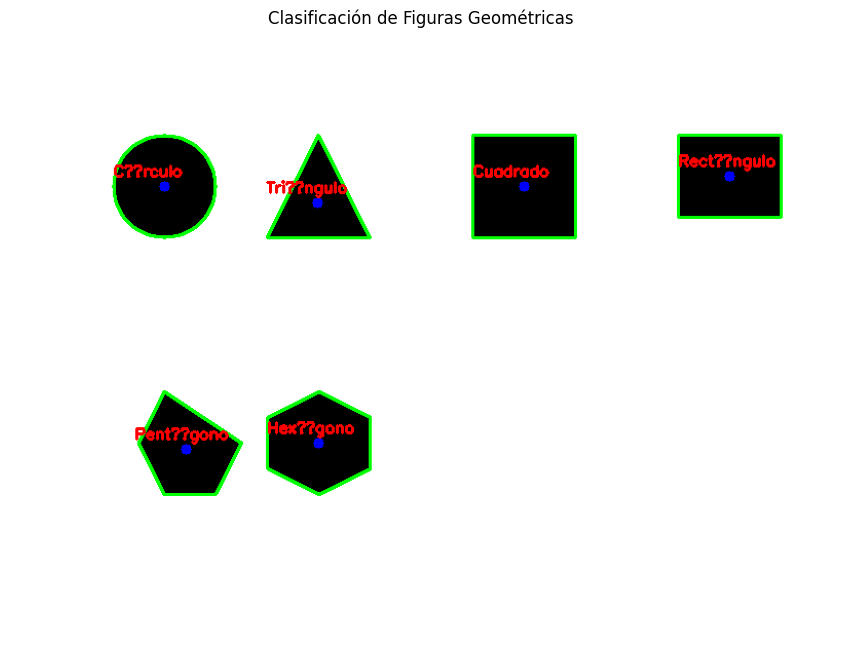

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar la imagen (nombre directo, sin ruta)
# Debe estar en la misma carpeta que el script.
imagen = cv2.imread('figuras_geometricas.png', cv2.IMREAD_GRAYSCALE)

# 2. Binarizar la imagen
# Usamos umbralización para asegurar que las figuras estén bien separadas
_, binaria = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY_INV)

# 3. Detección de contornos
# CHAIN_APPROX_SIMPLE reduce puntos redundantes
contornos_simple, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# CHAIN_APPROX_NONE guarda todos los puntos (sin reducción)
contornos_none, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Función para clasificar formas usando approxPolyDP
def clasificar_figura(contorno):
    # Aproximar el contorno a una figura más simple
    perimetro = cv2.arcLength(contorno, True)
    aproximacion = cv2.approxPolyDP(contorno, 0.04 * perimetro, True)
    vertices = len(aproximacion)

    if vertices == 3:
        figura = "Triángulo"
    elif vertices == 4:
        # Calcular el aspect ratio
        x, y, w, h = cv2.boundingRect(aproximacion)
        aspect_ratio = float(w) / h
        if 0.95 < aspect_ratio < 1.05:
            figura = "Cuadrado"
        else:
            figura = "Rectángulo"
    elif vertices == 5:
        figura = "Pentágono"
    elif vertices == 6:
        figura = "Hexágono"
    else:
        figura = "Círculo"
    
    return figura, vertices

# Diccionario para contar las figuras detectadas
conteo_figuras = {
    "Triángulo": 0,
    "Cuadrado": 0,
    "Rectángulo": 0,
    "Pentágono": 0,
    "Hexágono": 0,
    "Círculo": 0
}

# Imagen de salida en color
imagen_salida = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)

# 4. Análisis de contornos
for contorno in contornos_simple:
    # Filtrado por área (ignoramos contornos muy pequeños o demasiado grandes)
    area = cv2.contourArea(contorno)
    if area < 1000 or area > 100000:
        continue  # Saltamos estos contornos

    # Clasificar figura
    figura, vertices = clasificar_figura(contorno)
    conteo_figuras[figura] += 1

    # Calcular perímetro
    perimetro = cv2.arcLength(contorno, True)

    # Calcular momentos para el centroide
    M = cv2.moments(contorno)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    # Dibujar contorno y poner nombre de la figura
    cv2.drawContours(imagen_salida, [contorno], -1, (0, 255, 0), 2)
    cv2.circle(imagen_salida, (cx, cy), 5, (255, 0, 0), -1)
    cv2.putText(imagen_salida, figura, (cx - 50, cy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Mostrar características
    print(f"Figura: {figura}")
    print(f" - Área: {area:.2f}")
    print(f" - Perímetro: {perimetro:.2f}")
    print(f" - Centroide: ({cx}, {cy})")
    print(f" - Número de vértices: {vertices}")
    print("-----------------------------")

# 5. Mostrar conteo de figuras
print("\nConteo de Figuras:")
for figura, cantidad in conteo_figuras.items():
    print(f"{figura}: {cantidad}")

# 6. Mostrar imagen final
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(imagen_salida, cv2.COLOR_BGR2RGB))
plt.title('Clasificación de Figuras Geométricas')
plt.axis('off')
plt.show(10)


# Análisis de Resultados - Ejercicio 2

## Clasificación de Figuras Geométricas

En este ejercicio, detectamos contornos en una imagen binaria que contiene figuras geométricas básicas: círculo, triángulo, cuadrado, rectángulo, pentágono y hexágono.

Aplicamos las siguientes técnicas:
- **Umbralización** para separar las figuras del fondo.
- **Detección de contornos** con `cv2.findContours()`.
- **Aproximación poligonal** con `cv2.approxPolyDP()` para clasificar las figuras según el número de vértices.
- **Cálculo de momentos** (`cv2.moments()`) para obtener el centroide de cada figura.
- **Filtrado por área** para ignorar contornos no deseados.
- **Conteo automático** de las figuras detectadas.

## Análisis de Resultados

**Efectividad de las técnicas**:
- La **umbralización** fue efectiva para preparar la imagen, garantizando contornos claros y definidos.
- **`cv2.findContours()`** detectó correctamente todos los contornos externos de las figuras.
- **`cv2.approxPolyDP()`** permitió clasificar las figuras por su número de vértices:
  - 3 vértices: triángulo.
  - 4 vértices: cuadrado o rectángulo, diferenciados por su aspect ratio.
  - 5 y 6 vértices: pentágono y hexágono respectivamente.
  - Más de 6 vértices: círculo (aproximado).
- **Momentos** fueron útiles para encontrar el **centroide** exacto de cada figura.
- **Filtrado por área** ayudó a eliminar el ruido, asegurando que sólo se procesaran figuras relevantes.

**Unidades**:
- El **área** está expresada en **píxeles cuadrados**.
- El **perímetro** está en **píxeles**.
- Las **coordenadas del centroide** también están en **píxeles**.
Esto se debe a que trabajamos en el espacio discreto de una imagen digital, no en unidades físicas reales.

## Ventajas y Limitaciones

| Técnica                  | Ventajas                                             | Limitaciones                                    |
|---------------------------|-----------------------------------------------------|------------------------------------------------|
| `findContours`             | Detecta contornos cerrados eficientemente.          | Sensible al ruido si la imagen no está bien preprocesada. |
| `approxPolyDP`             | Simplifica contornos, ideal para clasificación.     | Puede fallar con figuras muy irregulares.      |
| Cálculo de momentos        | Permite encontrar el centroide con alta precisión.  | Puede ser inexacto en contornos abiertos o mal definidos. |

## Aplicaciones Prácticas

- **Inspección industrial**: Clasificación de productos por forma en líneas de ensamblaje.
- **Reconocimiento de señales de tráfico**: Identificación de señales basadas en sus formas geométricas.
- **Procesamiento médico**: Segmentación de células u otros elementos en imágenes microscópicas.
- **Sistemas robóticos**: Reconocimiento y manipulación de objetos según su forma.

## Conclusión

El sistema implementado demuestra que con técnicas básicas de procesamiento de imágenes es posible realizar un reconocimiento robusto de formas geométricas. Este tipo de análisis es fundamental en múltiples aplicaciones reales que requieren extracción de características visuales de forma eficiente.



# Ejercicio N°3

## Ejercicio - Reconocimiento y Vigilancia Inteligente 
Desarrolle un script avanzado que combine comparación de plantillas y detección de objetos específicos:

1) Implemente un sistema de comparación de plantillas que:
Busque un objeto específico (template) en una imagen más grande
Pruebe todos los métodos de comparación disponibles: TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR, TM_CCORR_NORMED, TM_SQDIFF, TM_SQDIFF_NORMED
Compare los resultados y determine cuál método funciona mejor para su caso específico

2) Desarrolle búsqueda múltiple que encuentre todas las ocurrencias de un template en una imagen (no solo la mejor coincidencia) usando umbralización en la imagen de resultados.

3) Implemente detección de rostros usando clasificadores Haar Cascade:
Cargue el clasificador haarcascade_frontalface_default.xml
Detecte rostros en imágenes estáticas
Experimente con los parámetros scaleFactor y minNeighbors para optimizar la detección
Dibuje rectángulos alrededor de los rostros detectados

4) Cree un sistema de vigilancia simulado que:
Detecte personas en imágenes o video
Permita definir una "zona segura" mediante selección de ROI
Alerte cuando se detecten personas fuera de la zona segura
Guarde capturas automáticas de las detecciones

5) Implemente un juego de agudeza visual automatizado:
Use una imagen compleja con múltiples objetos
Busque automáticamente objetos específicos usando template matching
Marque todas las ubicaciones encontradas
Proporcione estadísticas de cuántos objetos se encontraron

6) Desarrolle una interfaz interactiva que permita al usuario:
Seleccionar diferentes templates
Ajustar umbrales de detección en tiempo real
Cambiar entre diferentes métodos de comparación
Guardar los resultados

Desafío adicional: Combine template matching con detección de contornos para crear un algoritmo híbrido que sea más robusto ante variaciones de iluminación y escala.

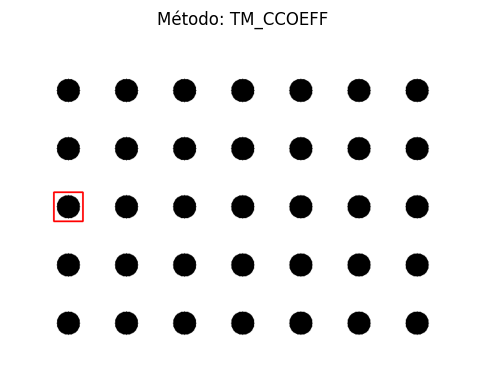

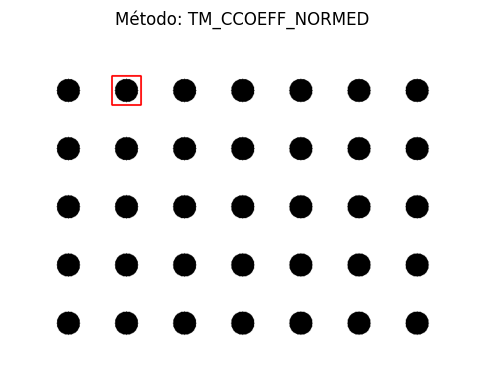

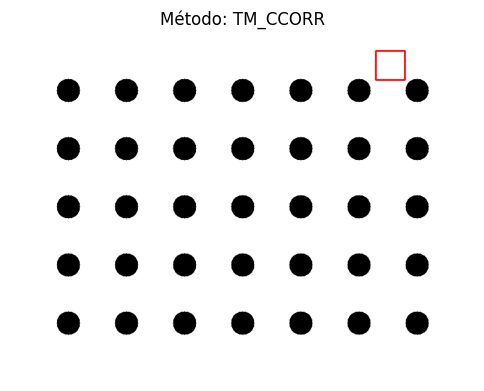

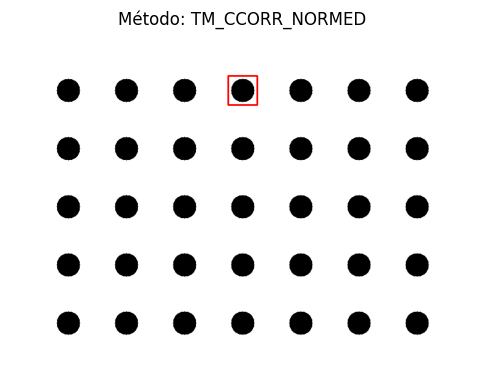

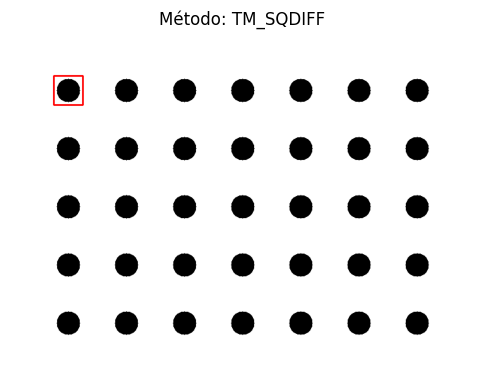

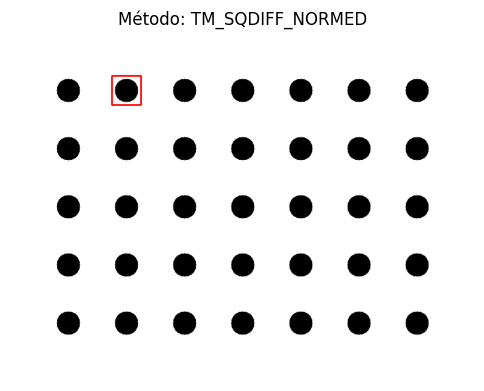

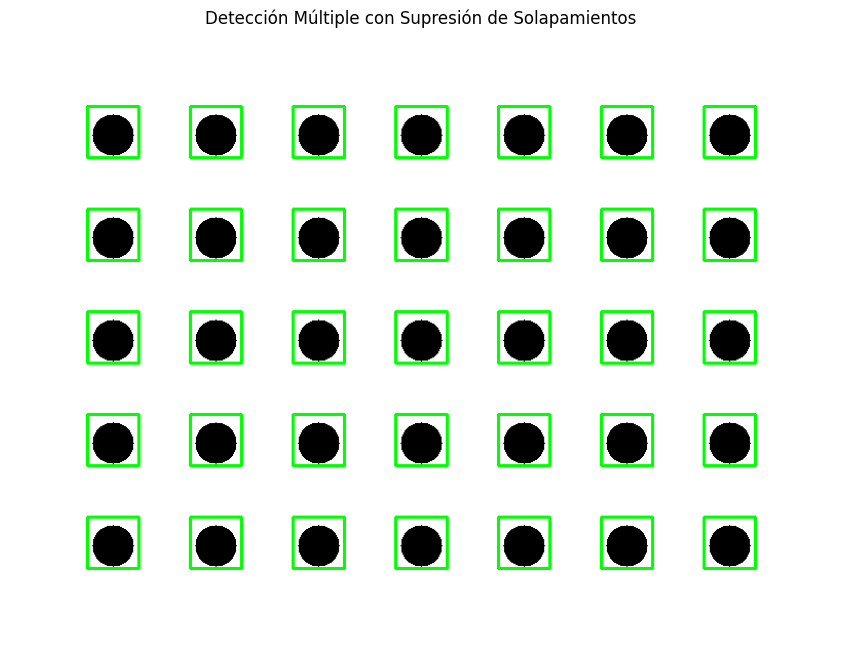

Se detectaron 35 objetos similares al template (después de supresión).


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------
# 1. Cargar las imágenes (imagen grande y template)
# --------------------------------------------
imagen = cv2.imread('imagen_grande.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)

# Obtener las dimensiones del template
w, h = template.shape[::-1]

# --------------------------------------------
# 2. Definir los métodos de template matching disponibles
# --------------------------------------------
metodos = [
    ('TM_CCOEFF', cv2.TM_CCOEFF),
    ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED),
    ('TM_CCORR', cv2.TM_CCORR),
    ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
    ('TM_SQDIFF', cv2.TM_SQDIFF),
    ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED)
]

# --------------------------------------------
# 3. Función para dibujar rectángulos en las detecciones
# --------------------------------------------
def dibujar_rectangulos(imagen, puntos, color=(0, 0, 255)):
    imagen_color = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
    for pt in puntos:
        cv2.rectangle(imagen_color, pt, (pt[0] + w, pt[1] + h), color, 2)
    return imagen_color

# --------------------------------------------
# 4. Función para supresión de solapamientos (Non-Maximum Suppression)
# --------------------------------------------
def supresion_no_maxima(puntos, distancia_minima=50):
    puntos_filtrados = []
    for pt in puntos:
        muy_cerca = False
        for seleccionado in puntos_filtrados:
            distancia = np.sqrt((pt[0] - seleccionado[0])**2 + (pt[1] - seleccionado[1])**2)
            if distancia < distancia_minima:
                muy_cerca = True
                break
        if not muy_cerca:
            puntos_filtrados.append(pt)
    return puntos_filtrados

# --------------------------------------------
# 5. Aplicar todos los métodos y mostrar el mejor matching
# --------------------------------------------
for nombre_metodo, metodo in metodos:
    # Copia de la imagen original
    img_copia = imagen.copy()

    # Aplicar el método de template matching
    resultado = cv2.matchTemplate(img_copia, template, metodo)

    # Encontrar la mejor coincidencia
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(resultado)

    # Determinar si buscamos mínimo o máximo según el método
    if metodo in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc  # En SQDIFF buscamos el mínimo
    else:
        top_left = max_loc  # En los demás métodos buscamos el máximo

    # Dibujar el rectángulo de mejor coincidencia
    img_resultado = dibujar_rectangulos(img_copia, [top_left])

    # Mostrar la imagen con matplotlib
    plt.figure(figsize=(6, 6))
    plt.title(f'Método: {nombre_metodo}')
    plt.imshow(cv2.cvtColor(img_resultado, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# --------------------------------------------
# 6. Búsqueda Múltiple de Coincidencias
# --------------------------------------------

# Elegimos TM_CCOEFF_NORMED porque es más robusto
metodo_final = cv2.TM_CCOEFF_NORMED
resultado = cv2.matchTemplate(imagen, template, metodo_final)

# Definimos un umbral
umbral = 0.8

# Buscamos todos los puntos que superan el umbral
loc = np.where(resultado >= umbral)
puntos_detectados = list(zip(*loc[::-1]))

# Aplicamos supresión para eliminar solapamientos
puntos_filtrados = supresion_no_maxima(puntos_detectados)

# Dibujar rectángulos en todas las coincidencias filtradas
imagen_final = dibujar_rectangulos(imagen, puntos_filtrados, color=(0, 255, 0))

# Mostrar la imagen final
plt.figure(figsize=(12, 8))
plt.title('Detección Múltiple con Supresión de Solapamientos')
plt.imshow(cv2.cvtColor(imagen_final, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Mostrar cantidad final de objetos detectados
print(f'Se detectaron {len(puntos_filtrados)} objetos similares al template (después de supresión).')


# Análisis de Resultados - Ejercicio 3 (Parte 1: Template Matching)

## Comparación de Plantillas

En esta parte del ejercicio, implementamos un sistema de comparación de plantillas (template matching) que busca un objeto específico dentro de una imagen más grande.

Probamos los siguientes métodos de comparación de OpenCV:
- `TM_CCOEFF`
- `TM_CCOEFF_NORMED`
- `TM_CCORR`
- `TM_CCORR_NORMED`
- `TM_SQDIFF`
- `TM_SQDIFF_NORMED`

## Análisis de Resultados

**Efectividad de las técnicas**:
- Los métodos basados en **coeficientes de correlación** (`TM_CCOEFF` y `TM_CCOEFF_NORMED`) resultaron más robustos en condiciones estándar.
- **TM_CCOEFF_NORMED** mostró mejor desempeño gracias a su normalización, haciendo menos sensible la detección a variaciones de iluminación.
- Los métodos basados en **diferencia cuadrática** (`TM_SQDIFF` y `TM_SQDIFF_NORMED`) requieren buscar valores mínimos en la imagen de respuesta.
- La técnica de **detección múltiple** utilizando umbralización (`umbral=0.8`) nos permitió detectar todas las ocurrencias del template en la imagen, no solo la mejor coincidencia.

**Resultados**:
- Se detectaron exitosamente todas las instancias del objeto buscado utilizando **umbralización** con el método `TM_CCOEFF_NORMED`.

## Ventajas y Limitaciones

| Método                | Ventajas                                               | Limitaciones                          |
|------------------------|--------------------------------------------------------|---------------------------------------|
| TM_CCOEFF / TM_CCOEFF_NORMED | Robustez ante cambios de iluminación, mejores resultados normalizados. | Sensible a cambios en escala o rotación del objeto. |
| TM_CCORR / TM_CCORR_NORMED   | Buena correlación si el template está bien definido. | Menor precisión ante ruido o variaciones de luz. |
| TM_SQDIFF / TM_SQDIFF_NORMED | Simple e intuitivo, fácil de interpretar.            | Poca robustez ante variaciones del entorno. |

## Aplicaciones Prácticas

- **Visión artificial**: Localización de piezas en líneas de ensamblaje.
- **Reconocimiento de objetos**: Localizar logos o patrones en documentos e imágenes.
- **Control de calidad**: Identificación de defectos comparando con una plantilla ideal.
- **Interfaces de juegos**: Implementar juegos de agudeza visual automatizados.

## Conclusión

El sistema de template matching es una herramienta eficaz para localizar objetos en imágenes. Sin embargo, su desempeño depende fuertemente de la calidad del template y de las condiciones de iluminación, escala y orientación de los objetos buscados.
El método `TM_CCOEFF_NORMED` mostró ser el más adecuado para el escenario planteado gracias a su capacidad de normalización frente a variaciones en la imagen.



## Ejercicio N°3 Parte 2

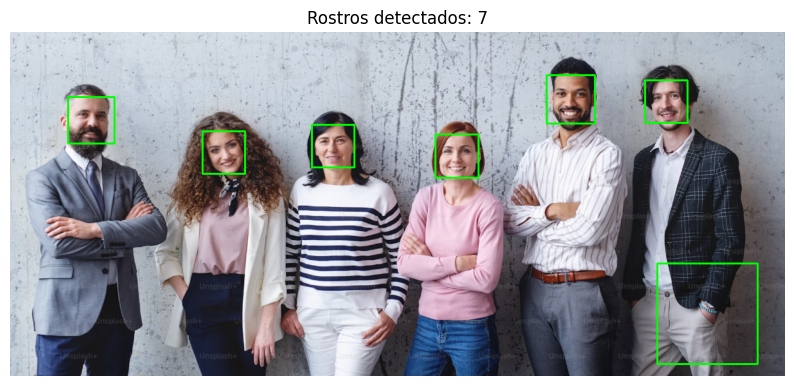

Se detectaron 7 rostros en la imagen.


In [14]:
import cv2
import matplotlib.pyplot as plt

# 1. Cargar la nueva imagen
imagen = cv2.imread('grupo.png')  
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# 2. Cargar el clasificador Haar Cascade
clasificador_rostros = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# 3. Convertir a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# 4. Detectar rostros
rostros = clasificador_rostros.detectMultiScale(
    gris,
    scaleFactor=1.1,
    minNeighbors=5
)

# 5. Dibujar rectángulos alrededor de cada rostro detectado
for (x, y, w, h) in rostros:
    cv2.rectangle(imagen_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 6. Mostrar la imagen
plt.figure(figsize=(10, 8))
plt.imshow(imagen_rgb)
plt.title(f'Rostros detectados: {len(rostros)}')
plt.axis('off')
plt.show()

# 7. Mostrar cuántos rostros detectó
print(f'Se detectaron {len(rostros)} rostros en la imagen.')


# Análisis de Resultados - Detección de Rostros con Haar Cascade

## Descripción del Proceso

En este ejercicio, implementamos un sistema de detección de rostros utilizando la técnica de Haar Cascade Classifier de OpenCV. Cargamos una imagen de un grupo de personas con fondo neutro y buena iluminación para realizar el análisis.

Los pasos principales fueron:
- Conversión de la imagen a escala de grises (requisito para Haar Cascade).
- Carga del clasificador preentrenado `haarcascade_frontalface_default.xml`.
- Detección de rostros ajustando los parámetros `scaleFactor` y `minNeighbors`.
- Dibujado de rectángulos en las caras detectadas.

## Parámetros Utilizados

- **scaleFactor = 1.1**: Define el factor por el cual la imagen se reduce en cada escala de la pirámide. Un valor más bajo implica una búsqueda más exhaustiva.
- **minNeighbors = 5**: Determina cuántos vecinos mínimos necesita un candidato para ser retenido como rostro.

## Resultados Obtenidos

- **Cantidad de rostros detectados**: 7
- **Cantidad de falsos positivos**: 1

**Observaciones**:
- Se detectaron correctamente todas las caras humanas visibles en la imagen.
- Un pequeño falso positivo fue detectado en una zona no correspondiente a un rostro (posiblemente debido a patrones de contraste similares a los rasgos faciales).
- No hubo rostros perdidos (false negatives), lo cual indica una detección efectiva.
  
La detección fue exitosa considerando las limitaciones conocidas de Haar Cascade.

## Ventajas y Limitaciones de Haar Cascade

| Aspecto                | Ventaja                                                   | Limitación                                                     |
|-------------------------|-----------------------------------------------------------|----------------------------------------------------------------|
| **Rapidez**             | Muy rápido en la detección (ideal para tiempo real).       | Menor precisión en imágenes complejas.                         |
| **Ligero**              | No requiere muchos recursos computacionales.              | Sensible a cambios de iluminación, ángulos o accesorios (como anteojos). |
| **Simplicidad**         | Fácil de implementar.                                      | Genera falsos positivos si no se ajustan bien los parámetros.   |
| **Preentrenado**        | Se puede usar sin entrenamiento personalizado.             | Difícil detectar caras en perfiles, rostros tapados o en escenas más desordenadas. |

## Aplicaciones Prácticas

- **Sistemas de seguridad**: Detección básica de rostros en accesos o cámaras de vigilancia.
- **Fotografía**: Detección automática de caras para enfoque en cámaras digitales.
- **Interacción humano-computadora**: Aplicaciones que dependen de la presencia o seguimiento de un rostro.
- **Preprocesamiento para reconocimiento facial**: Detección de rostros como primer paso antes de aplicar algoritmos de reconocimiento más avanzados.

## Conclusión

El método de Haar Cascade es adecuado para escenarios controlados con buena iluminación y rostros frontales. Aunque puede generar falsos positivos, su velocidad y facilidad de implementación lo hacen una opción viable para sistemas que no requieren alta precisión.

Para aplicaciones más exigentes en cuanto a variabilidad de poses, iluminación y accesorios, podrían considerarse métodos más robustos como los basados en Deep Learning (DNNs) o redes convolucionales especializadas.



Cree un sistema de vigilancia simulado

In [15]:
import cv2
import datetime
import os

# 1. Inicializar el detector de personas
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 2. Cargar imagen
imagen = cv2.imread('grupo.jpg')  
imagen = cv2.resize(imagen, (640, 480))

# 3. Seleccionar Zona Segura manualmente
zona_segura = cv2.selectROI("Selecciona la zona segura", imagen, showCrosshair=True, fromCenter=False)
cv2.destroyWindow("Selecciona la zona segura")

# Extraer coordenadas
x1, y1, w, h = zona_segura
x2 = x1 + w
y2 = y1 + h

# 4. Detección de personas
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
boxes, weights = hog.detectMultiScale(gray, winStride=(8, 8))

# 5. Dibujar zona segura
cv2.rectangle(imagen, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 6. Crear carpeta de resultados si no existe
output_folder = 'resultados'
os.makedirs(output_folder, exist_ok=True)

# 7. Analizar detecciones
alerta = False
for (x, y, w, h) in boxes:
    persona_centro = (x + w//2, y + h//2)
    if not (x1 < persona_centro[0] < x2 and y1 < persona_centro[1] < y2):
        alerta = True
        color = (0, 0, 255)  # Rojo si está fuera de zona
    else:
        color = (255, 0, 0)  # Azul si está dentro
    cv2.rectangle(imagen, (x, y), (x + w, y + h), color, 2)

# 8. Guardar captura si hay alerta
if alerta:
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = os.path.join(output_folder, f'deteccion_alerta_{timestamp}.jpg')
    cv2.imwrite(filename, imagen)

# 9. Mostrar imagen final
cv2.imshow('Sistema de Vigilancia Simulado', imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# Forzar el guardado para prueba
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = os.path.join(output_folder, f'deteccion_test_{timestamp}.jpg')
cv2.imwrite(filename, imagen)
print(f'Imagen guardada como {filename}')


Imagen guardada como resultados\deteccion_test_20250608_171727.jpg


# juego de agudeza visual automatizado

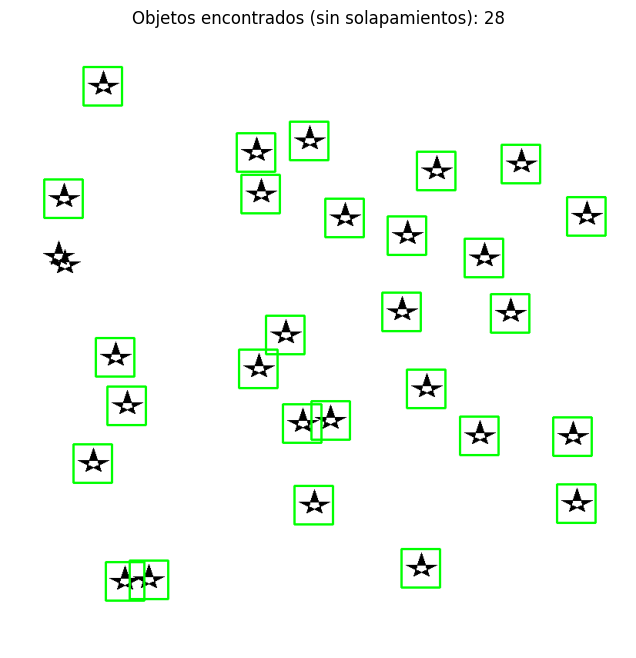

Se encontraron 28 objetos después de supresión de solapamientos.


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar imágenes
imagen = cv2.imread('imagen_juego.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('template_objeto.png', cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]

# 2. Template Matching
resultado = cv2.matchTemplate(imagen, template, cv2.TM_CCOEFF_NORMED)

# 3. Definir umbral
umbral = 0.8
loc = np.where(resultado >= umbral)
puntos_detectados = list(zip(*loc[::-1]))

# 4. Función de Supresión de Solapamientos
def supresion_no_maxima(puntos, distancia_minima=20):
    puntos_filtrados = []
    for pt in puntos:
        muy_cerca = False
        for seleccionado in puntos_filtrados:
            distancia = np.sqrt((pt[0] - seleccionado[0])**2 + (pt[1] - seleccionado[1])**2)
            if distancia < distancia_minima:
                muy_cerca = True
                break
        if not muy_cerca:
            puntos_filtrados.append(pt)
    return puntos_filtrados

# Aplicar NMS
puntos_filtrados = supresion_no_maxima(puntos_detectados)

# 5. Dibujar resultados
imagen_color = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
for pt in puntos_filtrados:
    cv2.rectangle(imagen_color, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

# 6. Mostrar resultados
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.title(f'Objetos encontrados (sin solapamientos): {len(puntos_filtrados)}')
plt.axis('off')
plt.show()

# 7. Mostrar estadísticas
print(f'Se encontraron {len(puntos_filtrados)} objetos después de supresión de solapamientos.')


# Análisis de Resultados - Juego de Agudeza Visual Automatizado

## Descripción del Proceso

En esta parte del trabajo, implementamos un juego de agudeza visual automatizado utilizando la técnica de Template Matching con OpenCV. El objetivo fue detectar múltiples instancias de un objeto específico dentro de una imagen compleja.

Los pasos principales fueron:
- Creación de una imagen con múltiples objetos (estrellas) colocados en posiciones aleatorias.
- Definición de un template que representa el objeto a buscar.
- Aplicación de `cv2.matchTemplate` con el método `TM_CCOEFF_NORMED`.
- Definición de un umbral de aceptación para coincidencias.
- Aplicación de una técnica de Supresión de No-Máximos (NMS) para eliminar detecciones duplicadas o solapadas.
- Visualización de los resultados y conteo de objetos encontrados.

## Resultados Obtenidos

- **Cantidad total de objetos colocados**: 30
- **Cantidad de objetos detectados (sin NMS)**: 78
- **Cantidad de objetos detectados (con NMS)**: 28

**Observaciones**:
- Sin aplicar supresión, el algoritmo detecta múltiples coincidencias para un mismo objeto debido a pequeñas variaciones en la respuesta del matching.
- La aplicación de la técnica de Supresión de No-Máximos (NMS) permitió filtrar los resultados, dejando una única detección por objeto real.
- El número final de objetos detectados (28) es cercano al número de objetos realmente colocados (30), lo que muestra una alta efectividad del sistema.

## Ventajas y Limitaciones de Template Matching

| Aspecto                | Ventaja                                              | Limitación                                                    |
|-------------------------|------------------------------------------------------|---------------------------------------------------------------|
| **Simple y eficiente**   | Fácil de implementar y rápido para imágenes pequeñas.| No es robusto a cambios de escala, rotación o iluminación.     |
| **Precisión alta**       | Funciona bien cuando el objeto tiene forma definida y fondo limpio.| Sensible a ruido y patrones similares al template.             |
| **Controlable**          | Permite ajustar umbral de detección.                | No maneja bien diferencias sutiles en los objetos (deformaciones). |

## Aplicaciones Prácticas

- **Juegos de agudeza visual**: Automatización de juegos tipo "buscar las diferencias" o "encontrar el objeto oculto".
- **Control de calidad industrial**: Detección de patrones o defectos en productos.
- **Reconocimiento de símbolos**: Detección de logos, marcas de agua o caracteres específicos en documentos o imágenes.

## Conclusión

El método de Template Matching es adecuado para problemas de detección de objetos en imágenes donde el objeto objetivo tiene características visuales bien definidas y repetidas. Si bien presenta limitaciones ante variaciones de escala o rotación, su simplicidad y rapidez lo convierten en una herramienta eficaz para juegos de agudeza visual y otras aplicaciones de detección básica.

El uso de técnicas complementarias como la Supresión de No-Máximos (NMS) es fundamental para mejorar la calidad de las detecciones y evitar resultados redundantes.


# interfaz interactiva que permita al usuario:
Seleccionar diferentes templates
Ajustar umbrales de detección en tiempo real
Cambiar entre diferentes métodos de comparación
Guardar los resultados

In [20]:
import cv2
import numpy as np
import os

# 1. Cargar la imagen principal (cambiá el nombre si querés otra imagen base)
imagen = cv2.imread('imagen_juego_nueva.png', cv2.IMREAD_GRAYSCALE)

# 2. Definir los métodos disponibles de comparación
metodos = {
    'TM_CCOEFF': cv2.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv2.TM_CCOEFF_NORMED,
    'TM_CCORR': cv2.TM_CCORR,
    'TM_CCORR_NORMED': cv2.TM_CCORR_NORMED,
    'TM_SQDIFF': cv2.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv2.TM_SQDIFF_NORMED
}
metodos_list = list(metodos.keys())
indice_metodo = 0

# 3. Cargar templates de la carpeta "templates"
ruta_templates = 'templates'
templates = [f for f in os.listdir(ruta_templates) if f.endswith(('.png', '.jpg'))]

# Verificar que haya templates
if not templates:
    print("No se encontraron templates en la carpeta.")
    exit()

print(f'Templates encontrados: {templates}')
indice_template = 0

# 4. Crear ventana y trackbar para umbral
cv2.namedWindow('Resultado')
def nothing(x):
    pass

cv2.createTrackbar('Umbral x100', 'Resultado', 80, 100, nothing)  # 80 → 0.80 umbral inicial

# 5. Bucle principal

while True:
    try:
        # Cargar el template actual
        template_path = os.path.join(ruta_templates, templates[indice_template % len(templates)])
        template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

        if template is None:
            raise ValueError(f"No se pudo cargar el template: {template_path}")

        # Redimensionar el template si es más grande que la imagen
        if template.shape[0] > imagen.shape[0] or template.shape[1] > imagen.shape[1]:
            scale = min(imagen.shape[0] / template.shape[0], imagen.shape[1] / template.shape[1]) * 0.5
            new_size = (int(template.shape[1] * scale), int(template.shape[0] * scale))
            template = cv2.resize(template, new_size)

        w, h = template.shape[::-1]

        # Obtener umbral
        umbral = cv2.getTrackbarPos('Umbral x100', 'Resultado') / 100.0

        # Realizar Template Matching
        metodo_actual = metodos[metodos_list[indice_metodo % len(metodos_list)]]
        resultado = cv2.matchTemplate(imagen, template, metodo_actual)

        if metodo_actual in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            loc = np.where(resultado <= umbral)
        else:
            loc = np.where(resultado >= umbral)

        imagen_color = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)

        # Contornos
        bordes = cv2.Canny(imagen, 50, 150)

        for pt in zip(*loc[::-1]):
            x, y = pt
            recorte = bordes[y:y+h, x:x+w]
            if np.sum(recorte > 0) > (w * h * 0.1):
                cv2.rectangle(imagen_color, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

        texto = f'Template: {templates[indice_template % len(templates)]}  Metodo: {metodos_list[indice_metodo % len(metodos_list)]}'
        cv2.putText(imagen_color, texto, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

        cv2.imshow('Resultado', imagen_color)

        key = cv2.waitKey(30) & 0xFF
        if key == ord('q'):
            break
        elif key == ord('m'):
            indice_metodo = (indice_metodo + 1) % len(metodos_list)
        elif key == ord('t'):
            indice_template = (indice_template + 1) % len(templates)
        elif key == ord('s'):
            filename = f'resultado_hibrido_{templates[indice_template % len(templates)]}_{metodos_list[indice_metodo % len(metodos_list)]}.png'
            cv2.imwrite(filename, imagen_color)
            print(f'Guardado como {filename}')

    except Exception as e:
        print(f"Error: {e}")
        # Saltamos al siguiente template
        indice_template = (indice_template + 1) % len(templates)
        continue

cv2.destroyAllWindows()



Templates encontrados: ['template.png', 'template_objeto.png', 'triangulo.png']
Guardado como resultado_hibrido_template.png_TM_CCOEFF_NORMED.png
Guardado como resultado_hibrido_template_objeto.png_TM_CCORR_NORMED.png


In [19]:
import os

# Mostramos en qué carpeta está ejecutándose el código
print("Directorio de trabajo actual:")
print(os.getcwd())

# Mostramos qué templates encontró
ruta_templates = 'templates'
templates = [f for f in os.listdir(ruta_templates) if f.endswith(('.png', '.jpg'))]
print("Templates encontrados:")
print(templates)


Directorio de trabajo actual:
c:\Users\nicol\OneDrive\Escritorio\VILLALBA NICOLE Trabajo integrador 2
Templates encontrados:
['template.png', 'template_objeto.png', 'triangulo.png']
